In [42]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import torch
import torch.nn as nn
import torch.optim

# Mackey Glass Dataset

In [43]:
# Parameters
beta = 0.2
gamma = 0.1
n = 10
tau = 17
t_max = 300
dt = 0.1
history = 1.2  # Initial condition for t < 0

In [44]:
def mackey_glass(n, tau, beta, gamma, t_max, dt, history):
    x = np.zeros((n, int(t_max/dt)))
    x[:, 0] = history
    for t in range(1, int(t_max/dt)):
        for i in range(n):
            x[i, t] = x[i, t-1] + dt * (beta * x[i, t-1-tau] / (1 + x[i, t-1-tau]**n) - gamma * x[i, t-1])
    return x

In [45]:
# Time range
time = np.arange(0, t_max, dt)
x = np.zeros(len(time))

# Initial history (for t < 0, assume a constant value)
x[:int(tau / dt)] = history 


In [46]:
# Euler method to integrate the Mackey-Glass equation
for t in range(int(tau/dt), len(time) - 1):
    x_t_tau = x[t - int(tau/dt)]  # Value of x(t - tau)
    x[t + 1] = x[t] + dt * (beta * x_t_tau / (1 + x_t_tau**n) - gamma * x[t])

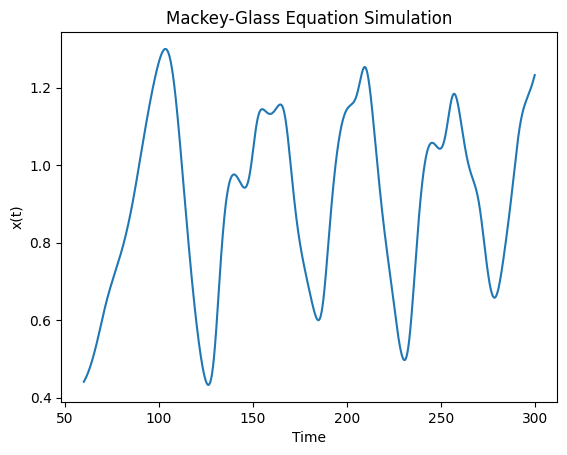

In [47]:
# Plot the generated data
plt.plot(time[600:], x[600:])
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.title('Mackey-Glass Equation Simulation')
plt.show()

## Mackey_Glass Class

In [77]:
class mackey_glass():
    def __init__(self, n = 0.2, tau = 17, beta = 0.2, gamma = 0.1, t_max = 300, dt = 0.1, history = 1.2):
        self.n = n
        self.tau = tau
        self.beta = beta
        self.gamma = gamma
        self.t_max = t_max
        self.dt = dt
        self.history = history

    



# RESERVOIR

In [48]:
# Parameters
n_reservoir = 100
leak_rate = 0.3
spectral_radius = 0.9
input_scaling = 1.0
bias_scaling = 0.0

# Generate random weight matrices with a specific spectral radius
def generate_spectral_reservoir(n_reservoir, spectral_radius):
    # Generate sparse, uniformly distributed weights
    W = scipy.sparse.rand(n_reservoir, n_reservoir, density=0.2).todense()
    # Ensure the spectral radius is within the desired range
    rho_W = max(abs(np.linalg.eigvals(W)))
    W *= spectral_radius / rho_W
    return W

In [49]:
dxdt = beta * x_t_tau / (1 + x_t_tau**n) - gamma * x[t]
dxdt

np.float64(0.01830319179312649)

In [50]:
def hump_function(x, b, n, gamma):
    #x_t_tau = x[t - int(tau/dt)]
    return b * x / (1 + x**n) - gamma * x

def plot_hump():
    plt.plot(x, h1)
    #plt.plot(x, h2)
    #plt.plot(x, h2)
    plt.plot(x, h4)
    #plt.plot(x, h5)
    #plt.plot(x, h5)
    plt.xlabel('x')
    plt.ylabel('h(x)')
    plt.title('Hump Function')
    plt.legend(['b=0.1, n=1', 'b=0.1, n=2', 'b=0.1, n=3', 'b=0.2, n=1', 'b=0.2, n=2', 'b=0.2, n=3'])
    plt.show()

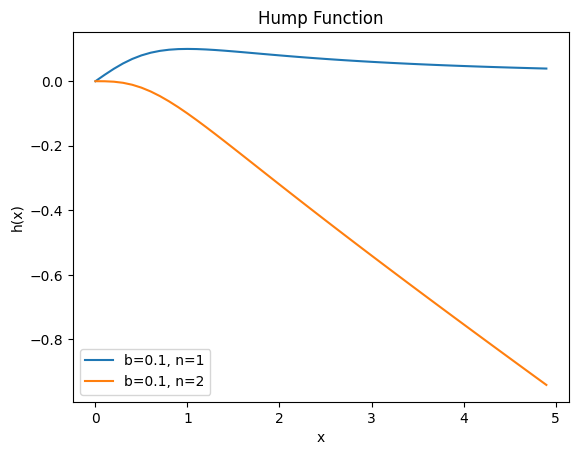

In [51]:
x = np.arange(0, 5, 0.1)
h1 = hump_function(x, 0.2, 2, 0)
#h2 = hump_function(x, 0.1, 3)
#h3 = hump_function(x, 0.1, 5)

h4 = hump_function(x, 0.2, 2, 0.2)
#h5 = hump_function(x, 0.2, 3)
#h6 = hump_function(x, 0.2, 5)

plot_hump()


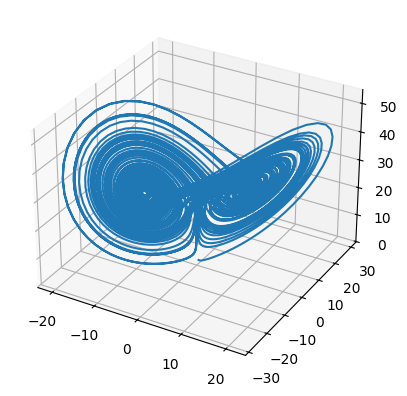

In [76]:
from Datasets import *

object = LorenzAttractor()
object.plot()